In [1]:
import numpy as np

from pandas import read_csv
from sklearn import datasets

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adagrad, Adam

from tensorflow.keras.utils import to_categorical
# Eithe Keras or Sklearn function can be used for one-hot encodong
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
# Read data from file stored in the Keras Libarary definition
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# Plot the data in 3D
# Note there are four features but we are only plotting 3. Try plotting each combination
# of the four input features.
fig = plt.figure(0, figsize=(5, 4))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2],c=y)
ax.set_title("Data")

Text(0.5, 0.92, 'Data')

<Figure size 500x400 with 0 Axes>

In [4]:
y_onehot_encoded_Keras = to_categorical(y).astype(int)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot_encoded_Keras, test_size=0.2, random_state=42)

In [6]:
# Scale the data with respect to the training data set
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)

# Scaling the test set using the transform defined by the train set.
X_scaled_test = scaler.transform(X_test)

In [7]:
#
# PCA
#

pca = PCA(n_components=2)
pca.fit(X_scaled_train)
X_pca_train = pca.transform(X_scaled_train)

X_pca_test = pca.transform(X_scaled_test)



# Output PCA variance results
print("Singular values = \n",pca.singular_values_)  # Not required to print
print("\nProportion of variance = \n",pca.explained_variance_ratio_) # Required to print


Singular values = 
 [18.66137268 10.50735099]

Proportion of variance = 
 [0.72551423 0.23000922]


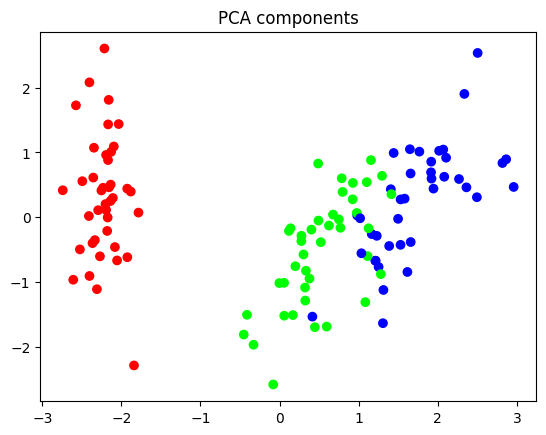

In [8]:
plt.scatter(X_pca_train[:,0],X_pca_train[:,1],c=y_train)
plt.title("PCA components")
plt.savefig("PCA_plot.png")
plt.show()

In [9]:
#
# Factor Analysis
#

fanal = FactorAnalysis(n_components=2)
fanal.fit(X_scaled_train)

X_fanal_train = fanal.transform(X_scaled_train)
X_fanal_test = fanal.transform(X_scaled_test)
print(X_scaled_train.shape[0])

120


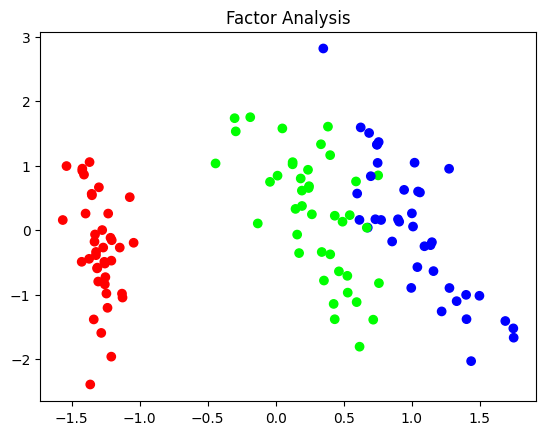

In [10]:
plt.scatter(X_fanal_train[:,0],X_fanal_train[:,1],c=y_train)
plt.title("Factor Analysis")
plt.savefig("FA.png")
plt.show()

In [11]:
#
# AutoEncoder
#

input_data = Input(shape=(4,))
encoder = Dense(units=2,activation='relu')(input_data)
decoder = Dense(units=4,activation='linear')(encoder)

autoencoder = Model(input_data,decoder)
opt = Adagrad(learning_rate=0.1)
autoencoder.compile(optimizer=opt,loss='mean_squared_error')
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
Total params: 22 (88.00 Byte)
Trainable params: 22 (88.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
autoencoder.fit(X_scaled_train,X_scaled_train,epochs=2000,batch_size=X_scaled_train.shape[0])

Epoch 1/2000

1/1 [==============================] - 0s 391ms/step - loss: 1.5352
Epoch 2/2000
1/1 [==============================] - 0s 5ms/step - loss: 1.2331
Epoch 3/2000
1/1 [==============================] - 0s 0s/step - loss: 1.1249
Epoch 4/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.0648
Epoch 5/2000
1/1 [==============================] - 0s 7ms/step - loss: 1.0256
Epoch 6/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.9970
Epoch 7/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.9744
Epoch 8/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.9553
Epoch 9/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.9373
Epoch 10/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.9196
Epoch 11/2000
1/1 [==============================] - 0s 0s/step - loss: 0.9027
Epoch 12/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.8864
Epoch 13/2000
1/1 [============================

KeyboardInterrupt: 

In [ ]:
hidden_layers = tf.keras.backend.function(
[autoencoder.layers[0].input],  # we will feed the function with the input of the first layer
[autoencoder.layers[1].output,] # we want to get the output of the second layer
)
latent = hidden_layers([X_scaled_train])[0]

In [ ]:
plt.scatter(latent[:,0],latent[:,1],c=y_train)
plt.savefig("AE.png")
plt.show()